Import Libraries and Load Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
df = pd.read_parquet("cleaned_hotel.parquet")
print("Shape of dataset:", df.shape)


Shape of dataset: (119390, 19)


Data Preprocessing

Separate features (X) and target (y)

In [15]:
target = 'is_canceled'
X = df.drop(columns=[target])
y = df[target]

Encode categorical variables

In [16]:
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns
print("Categorical Columns:", list(categorical_cols))
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))

Categorical Columns: ['hotel', 'arrival_date_month', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'deposit_type', 'customer_type']


Scale numerical features

In [17]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", list(numerical_cols))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

Numerical Columns: ['hotel', 'lead_time', 'arrival_date_month', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'deposit_type', 'customer_type', 'total_of_special_requests', 'total_guests', 'total_stay', 'high_request', 'high_canceller', 'last_minute', 'cancellation_ratio']


Split data into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (95512, 18)
Testing data shape: (23878, 18)


Model Selection (Baseline Model)

In [19]:
#Evaluation Metrics:
#- Accuracy
#- Precision
#- Recall
#- F1 Score
#- ROC-AUC

Logistic Regression Performance:
Accuracy:  0.8015
Precision: 0.8842
Recall:    0.5167
F1 Score:  0.6522
ROC-AUC:   0.8383


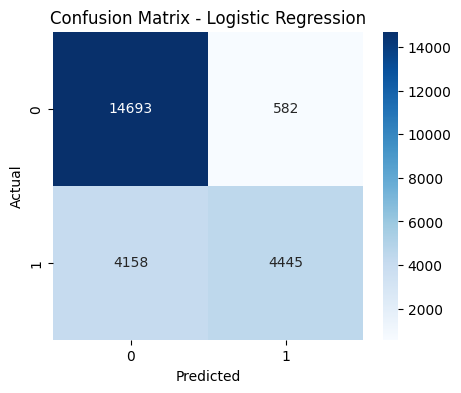

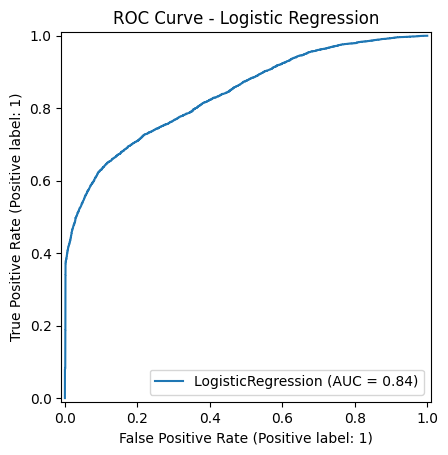

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print("Logistic Regression Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

Model comparison

c:\Users\palak\Desktop\data analyst\Hotel Booking\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:52:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Random Forest,0.837884,0.801786,0.730675,0.764581,0.898734
XGBoost,0.833319,0.835535,0.669069,0.743093,0.895777
Logistic Regression,0.801491,0.884225,0.516680,0.652238,0.838311


<Figure size 1000x600 with 0 Axes>

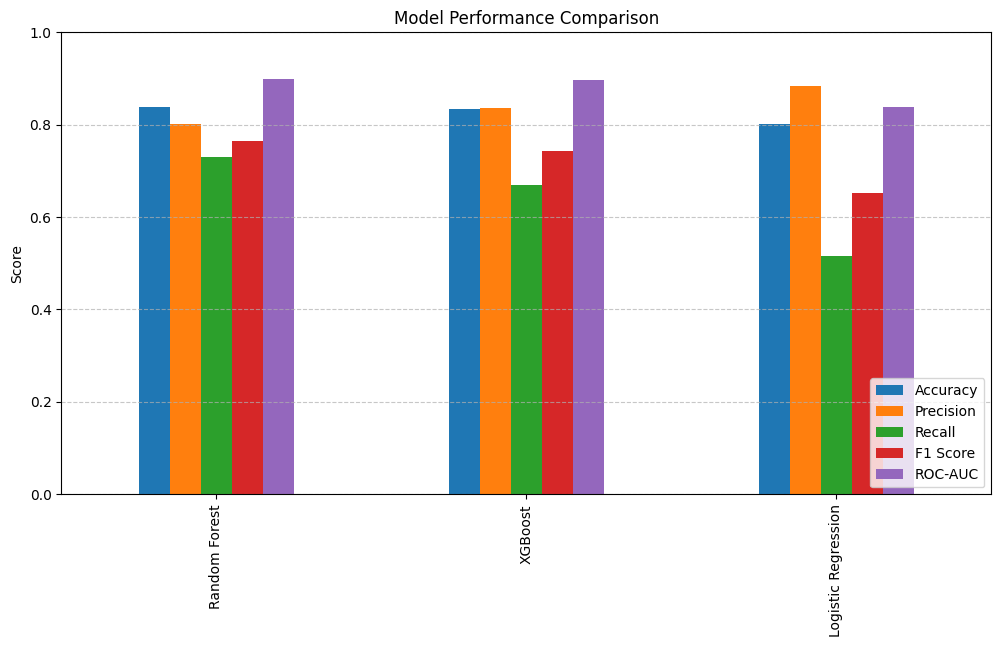

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy":  accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall":    recall_score(y_test, y_pred),
        "F1 Score":  f1_score(y_test, y_pred),
        "ROC-AUC":   roc_auc_score(y_test, y_pred_proba)
    }

comparison_df = pd.DataFrame(results).T.sort_values(by="ROC-AUC", ascending=False)
display(comparison_df)

plt.figure(figsize=(10,6))
comparison_df[["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]].plot(
    kind="bar", figsize=(12,6)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="lower right")
plt.show()


comparison with advance model

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Random Forest,0.837884,0.801786,0.730675,0.764581,0.898734
CatBoost,0.831770,0.836414,0.662676,0.739477,0.896306
XGBoost,0.833319,0.835535,0.669069,0.743093,0.895777
LightGBM,0.827959,0.837412,0.648378,0.730870,0.889482
Gradient Boosting,0.819541,0.844181,0.612112,0.709656,0.872094
Logistic Regression,0.801491,0.884225,0.516680,0.652238,0.838311


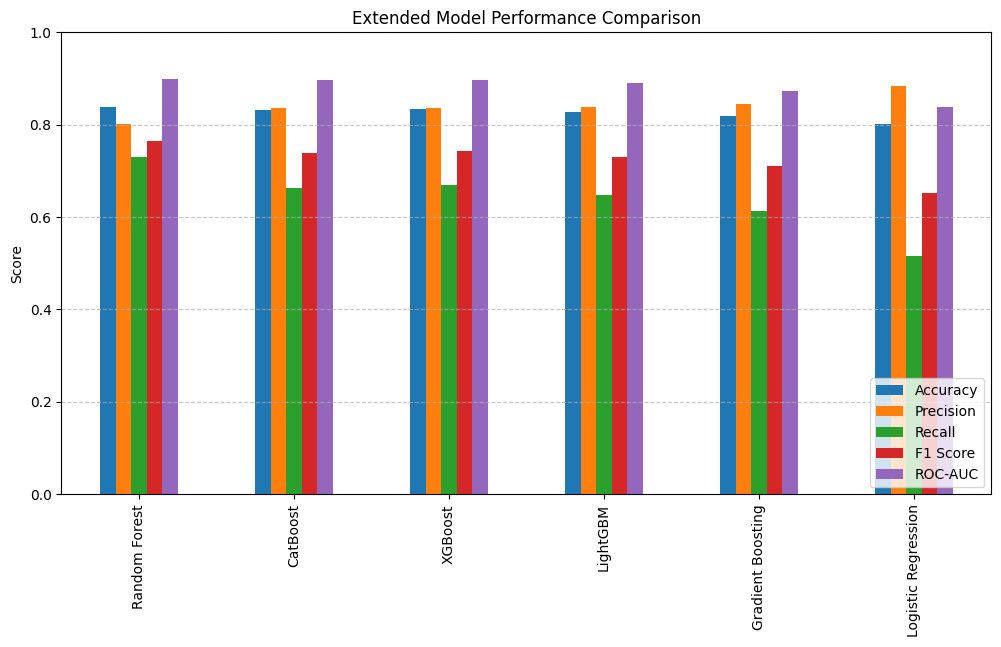

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

extra_models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

for name, model in extra_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy":  accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall":    recall_score(y_test, y_pred),
        "F1 Score":  f1_score(y_test, y_pred),
        "ROC-AUC":   roc_auc_score(y_test, y_pred_proba)
    }

comparison_df = pd.DataFrame(results).T.sort_values(by="ROC-AUC", ascending=False)
display(comparison_df)

comparison_df[["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]].plot(
    kind="bar", figsize=(12,6)
)
plt.title("Extended Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="lower right")
plt.show()


Recall is more critical in this case because:
we want to catch as many potential cancellations as possible,
even if it means a few false positives.
Precision means: when the model says “cancel,” how often it’s right.
But missing an actual cancel (low recall) can cause business loss (unprepared hotel capacity).
so, selected model is Random Forest.

Random Forest Model Fine-Tuning

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END class_weight=balanced, max_depth=20, min_sample

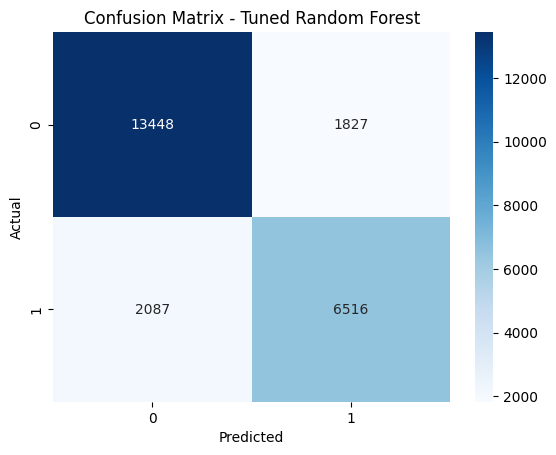

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,            
    scoring='recall',
    cv=3,
    verbose=2,
    n_jobs=1,             
    random_state=42
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

y_pred_best = best_rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])
print("ROC-AUC:", roc_auc)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


After tuning, recall improved (from ~0.73 to ~0.76) and ROC-AUC increased to 0.91

 Model Evaluation & Saving

Model Evaluation Metrics (Tuned Random Forest)
Accuracy:  0.8361
Precision: 0.7810
Recall:    0.7574
F1 Score:  0.7690
ROC-AUC:   0.9076


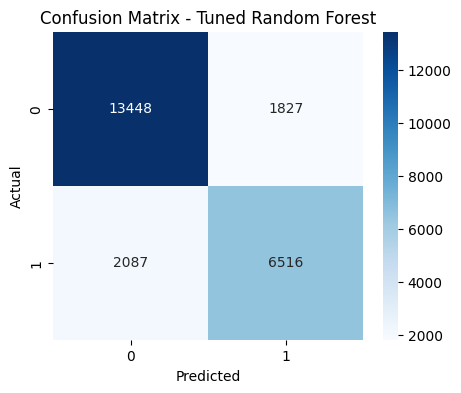

['random_forest_model.pkl']

In [24]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_proba_best)

print("Model Evaluation Metrics (Tuned Random Forest)")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

joblib.dump(best_rf, "random_forest_model.pkl")

Feature Importance Visualization

                           Feature  Importance
1                        lead_time    0.232894
9                     deposit_type    0.186523
3                   market_segment    0.094878
11       total_of_special_requests    0.093543
2               arrival_date_month    0.065776
13                      total_stay    0.059055
10                   customer_type    0.049462
17              cancellation_ratio    0.042106
16                     last_minute    0.039170
8                  booking_changes    0.037727
6           previous_cancellations    0.030458
12                    total_guests    0.025673
4             distribution_channel    0.018798
0                            hotel    0.013829
7   previous_bookings_not_canceled    0.004969
5                is_repeated_guest    0.002577
14                    high_request    0.002445
15                  high_canceller    0.000116


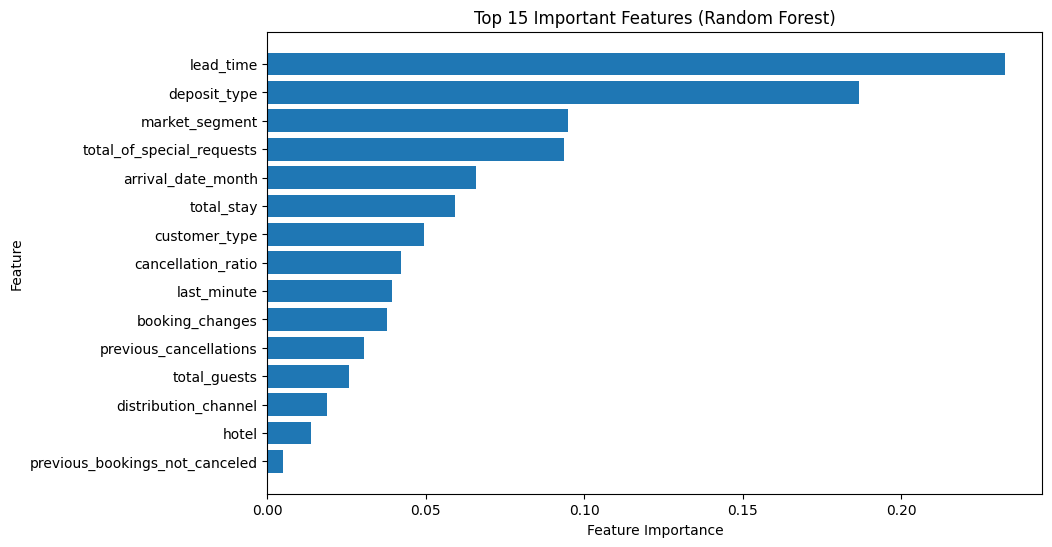

In [25]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()